<h2>1. How de we test the performance of a model?</h2>

In [2]:
import pandas as pd
df = pd.read_csv('../datasets/milk_price_market_survey.csv')
df.head()

,gram,price
0,1350.0,180.0
1,1400.0,176.0
2,1250.0,140.0
3,750.0,93.0
4,900.0,135.0


In [3]:
X = df[['gram']] 
y = df[['price']]

<ul>
    <li>Training/Test set split</li>
    <li>Cross-validation</li>
</ul>

<h3>1.1 Training/ Test set split</h3>

The dataset is divided into training and test set, where the training set builds the model and the test set assess its performance.

<img src="media/train_test_split.png"/>

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=1234)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

mlr = LinearRegression() #MLR = multivariate linear regression
mlr.fit(X_train, y_train) #model training

y_pred_train = mlr.predict(X_train) #get model prediction on trainign data
r2_score_train = r2_score(y_train,y_pred_train)

y_pred_test = mlr.predict(X_test) #get model prediction on test data
r2_score_test = r2_score(y_test,y_pred_test)

print("r2_score-train: ",r2_score_train)
print("r2_score-test: ",r2_score_test)


r2_score-train:  0.9105743325791579
r2_score-test:  0.9191706611980854


<h3>2.2 Cross-validation</h3>

To reduce, the model bias towards a portion of the dataset, cross-validation is used as a more robust approach to assessing the model performance. On such technique is <b>k-Fold crossvalidation</b>

<img src="media/crossvalidation.png"/>

The model is re-trained k times, whereby in each iteration, k-1 subsets are used for training
one subeset is used for testing.

In [6]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scoring = ['r2']
scores = cross_validate(mlr, X, y, cv=cv, scoring=scoring)
print(scores)

{'fit_time': array([0.00176978, 0.00129414, 0.00121593, 0.0011971 , 0.0011878 ]), 'score_time': array([0.00123024, 0.00092602, 0.00088191, 0.00087094, 0.00090599]), 'test_r2': array([0.92138242, 0.8538074 , 0.9145879 , 0.90038949, 0.92665904])}


In [7]:
r2_scores = scores['test_r2']
mean_r2 = r2_scores.mean()
print('cross-validation r2:',mean_r2)

cross-validation r2: 0.9033652504143722


scoring values: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

<table class="docutils align-default">
<thead>
<tr class="row-odd"><th class="head"><p>Scoring</p></th>
<th class="head"><p>Function</p></th>
<th class="head"><p>Comment</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><strong>Classification</strong></p></td>
<td></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘accuracy’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score" title="sklearn.metrics.accuracy_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.accuracy_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘balanced_accuracy’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score" title="sklearn.metrics.balanced_accuracy_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.balanced_accuracy_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘top_k_accuracy’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.top_k_accuracy_score.html#sklearn.metrics.top_k_accuracy_score" title="sklearn.metrics.top_k_accuracy_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.top_k_accuracy_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘average_precision’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score" title="sklearn.metrics.average_precision_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.average_precision_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_brier_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.brier_score_loss.html#sklearn.metrics.brier_score_loss" title="sklearn.metrics.brier_score_loss"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.brier_score_loss</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘f1’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>for binary targets</p></td>
</tr>
<tr class="row-odd"><td><p>‘f1_micro’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>micro-averaged</p></td>
</tr>
<tr class="row-even"><td><p>‘f1_macro’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>macro-averaged</p></td>
</tr>
<tr class="row-odd"><td><p>‘f1_weighted’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>weighted average</p></td>
</tr>
<tr class="row-even"><td><p>‘f1_samples’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>by multilabel sample</p></td>
</tr>
<tr class="row-odd"><td><p>‘neg_log_loss’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss" title="sklearn.metrics.log_loss"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.log_loss</span></code></a></p></td>
<td><p>requires <code class="docutils literal notranslate"><span class="pre">predict_proba</span></code> support</p></td>
</tr>
<tr class="row-even"><td><p>‘precision’ etc.</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score" title="sklearn.metrics.precision_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.precision_score</span></code></a></p></td>
<td><p>suffixes apply as with ‘f1’</p></td>
</tr>
<tr class="row-odd"><td><p>‘recall’ etc.</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score" title="sklearn.metrics.recall_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.recall_score</span></code></a></p></td>
<td><p>suffixes apply as with ‘f1’</p></td>
</tr>
<tr class="row-even"><td><p>‘jaccard’ etc.</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.jaccard_score.html#sklearn.metrics.jaccard_score" title="sklearn.metrics.jaccard_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.jaccard_score</span></code></a></p></td>
<td><p>suffixes apply as with ‘f1’</p></td>
</tr>
<tr class="row-odd"><td><p>‘roc_auc’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘roc_auc_ovr’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘roc_auc_ovo’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘roc_auc_ovr_weighted’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘roc_auc_ovo_weighted’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p><strong>Clustering</strong></p></td>
<td></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘adjusted_mutual_info_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.adjusted_mutual_info_score.html#sklearn.metrics.adjusted_mutual_info_score" title="sklearn.metrics.adjusted_mutual_info_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.adjusted_mutual_info_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘adjusted_rand_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score" title="sklearn.metrics.adjusted_rand_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.adjusted_rand_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘completeness_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score" title="sklearn.metrics.completeness_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.completeness_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘fowlkes_mallows_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.fowlkes_mallows_score.html#sklearn.metrics.fowlkes_mallows_score" title="sklearn.metrics.fowlkes_mallows_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.fowlkes_mallows_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘homogeneity_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.homogeneity_score.html#sklearn.metrics.homogeneity_score" title="sklearn.metrics.homogeneity_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.homogeneity_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘mutual_info_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mutual_info_score.html#sklearn.metrics.mutual_info_score" title="sklearn.metrics.mutual_info_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mutual_info_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘normalized_mutual_info_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.normalized_mutual_info_score.html#sklearn.metrics.normalized_mutual_info_score" title="sklearn.metrics.normalized_mutual_info_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.normalized_mutual_info_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘rand_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.rand_score.html#sklearn.metrics.rand_score" title="sklearn.metrics.rand_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.rand_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘v_measure_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.v_measure_score.html#sklearn.metrics.v_measure_score" title="sklearn.metrics.v_measure_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.v_measure_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p><strong>Regression</strong></p></td>
<td></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘explained_variance’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.explained_variance_score.html#sklearn.metrics.explained_variance_score" title="sklearn.metrics.explained_variance_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.explained_variance_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘max_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.max_error.html#sklearn.metrics.max_error" title="sklearn.metrics.max_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.max_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_mean_absolute_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error" title="sklearn.metrics.mean_absolute_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_absolute_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘neg_mean_squared_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error" title="sklearn.metrics.mean_squared_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_squared_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_root_mean_squared_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error" title="sklearn.metrics.mean_squared_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_squared_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘neg_mean_squared_log_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error" title="sklearn.metrics.mean_squared_log_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_squared_log_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_median_absolute_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.median_absolute_error.html#sklearn.metrics.median_absolute_error" title="sklearn.metrics.median_absolute_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.median_absolute_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘r2’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score" title="sklearn.metrics.r2_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.r2_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_mean_poisson_deviance’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_poisson_deviance.html#sklearn.metrics.mean_poisson_deviance" title="sklearn.metrics.mean_poisson_deviance"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_poisson_deviance</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘neg_mean_gamma_deviance’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_gamma_deviance.html#sklearn.metrics.mean_gamma_deviance" title="sklearn.metrics.mean_gamma_deviance"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_gamma_deviance</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_mean_absolute_percentage_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_absolute_percentage_error.html#sklearn.metrics.mean_absolute_percentage_error" title="sklearn.metrics.mean_absolute_percentage_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_absolute_percentage_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘d2_absolute_error_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.d2_absolute_error_score.html#sklearn.metrics.d2_absolute_error_score" title="sklearn.metrics.d2_absolute_error_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.d2_absolute_error_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘d2_pinball_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.d2_pinball_score.html#sklearn.metrics.d2_pinball_score" title="sklearn.metrics.d2_pinball_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.d2_pinball_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘d2_tweedie_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.d2_tweedie_score.html#sklearn.metrics.d2_tweedie_score" title="sklearn.metrics.d2_tweedie_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.d2_tweedie_score</span></code></a></p></td>
<td></td>
</tr>
</tbody>
</table>

<h2>2. Class Imbalance in Classification</h2>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../datasets/Healthcare-Diabetes.csv')
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


Text(0, 0.5, 'Frequency')

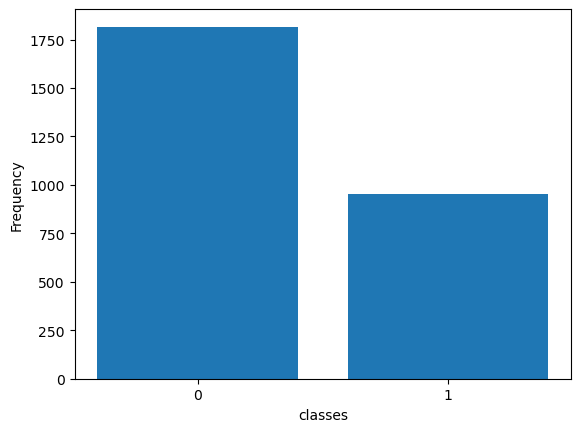

In [9]:
class_df = df[['Outcome']]
result = class_df.groupby('Outcome').value_counts()
classes = result.index.tolist()
values = result.tolist()

plt.figure()
plt.bar(classes, values)
plt.xticks([0,1],['0','1'])
plt.xlabel('classes')
plt.ylabel('Frequency')

In a classification problem, class data imbalance can lead to learning problems, when the model has got more datapoint for one class than the other, it may <b>train better to recognise one class over the other(s)</b>.

<h3>Techniques to Resolve class-imbalance</h3>

<ul>
    <li><b>Downsampling</b>: taking a random subset of the majority class small enough to match the number of observations in the minority class.<br/></li>
    <li><b>Upsampling</b>:taking repeated random samples from the minority class until we have as many observations as the majority class. This grows the size of the minority class by effectively duplicating observations at random.<br/></li>
    <li><b>Downsample + Upsample</b></li>
    <li><b>SMOTE</b>: stands for Synthetic Minority Over-sampling Technique - using interpolation from neighbouring values</li>
</ul>


<b>Downsampling</b>



In [22]:
from sklearn.utils import resample

class_1_df = df[df['Outcome']==1]
class_0_df = df[df['Outcome']==0]

# Downsample majority
class_0_downsampled = resample(class_0_df,
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples=len(class_1_df), # match number in minority class
                          random_state=1234) # reproducible results
# Combine downsampled majority class with minority class
downsampled_df = pd.concat([class_0_downsampled, class_1_df])


Text(0, 0.5, 'Frequency')

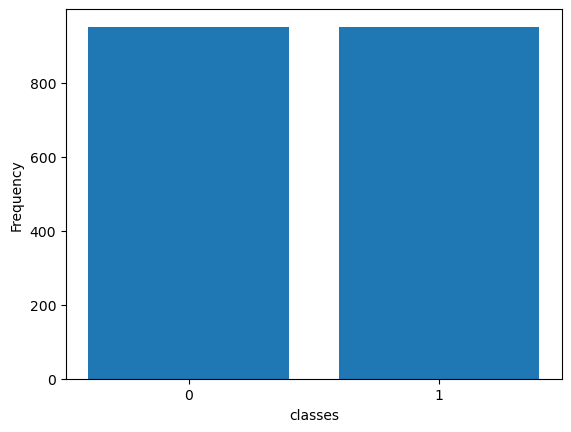

In [18]:
class_df = downsampled_df[['Outcome']]
result = class_df.groupby('Outcome').value_counts()
classes = result.index.tolist()
values = result.tolist()

plt.figure()
plt.bar(classes, values)
plt.xticks([0,1],['0','1'])
plt.xlabel('classes')
plt.ylabel('Frequency')

<b>Upsampling</b>

In [20]:
# Upsample minority
class_1_upsampled = resample(class_1_df,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=len(class_0_df), # match number in majority class
                          random_state=1234) # reproducible results

# Combine upsampled minority class with majority class
upsampled_df = pd.concat([class_0_df, class_1_upsampled])



Text(0, 0.5, 'Frequency')

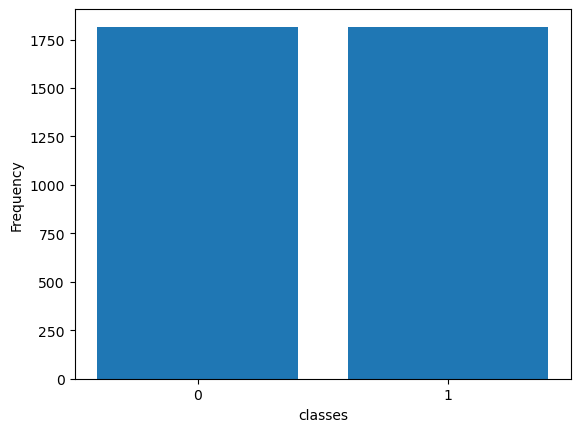

In [21]:
class_df = upsampled_df[['Outcome']]
result = class_df.groupby('Outcome').value_counts()
classes = result.index.tolist()
values = result.tolist()

plt.figure()
plt.bar(classes, values)
plt.xticks([0,1],['0','1'])
plt.xlabel('classes')
plt.ylabel('Frequency')

<h3>3. Classification Metrics</h3>

The Classification Report gives us more information on where our model is going wrong - looking specifically at the performance caused by Type I & II errors.  The following metrics are calculated as part of the classification report.

<b>Accuracy</b><br/>
$$Accuracy =  \frac{Correct\space predictions}{Total\space predictions} = \frac{TP + \space TN}{TP \space + \space TN \space + \space FP \space + \space FN}$$

#### Precision

When it predicts _yes_, how often is it correct? 

$$ Precision = \frac{TP}{TP \space + FP} = \frac{TP}{Total \space Predicted \space Positive} $$

#### Recall

When the outcome is actually _yes_, how often do we predict it as such?

$$ Recall = \frac{TP}{TP \space + FN} = \frac{TP}{Total \space Actual \space Positive}$$

#### F1 Score

Weighted average of precision and recall. 

$$F_1 = 2 \times \frac {Precision \space \times \space Recall }{Precision \space + \space Recall }$$

F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall _and_ there is an uneven class distribution (large number of 1s vs 0s or vice versa).